In [1]:
from horseshoe_gibbs import sample_gibbs, sample_gibbs_improved
import torch
import matplotlib.pyplot as plt
from itertools import product

In [2]:
n = 100
p = 200

In [3]:
torch.manual_seed(0)
X = torch.randn(n, p)
w = torch.randn(p) * torch.bernoulli(torch.ones(p) * 0.1)
y = X @ w

results_naive = sample_gibbs(X, y, 1000, n_warmup=0, debug=True)

res:  5.387e+01 | coef:  4.518e+00 | sigma2:  5.215e+01 lamb2:  7.308e+00 | tau2:  9.410e-01
res:  1.232e+01 | coef:  2.855e-01 | sigma2:  1.526e+01 lamb2:  7.071e+00 | tau2:  8.040e-03
res:  2.722e+00 | coef:  1.129e-01 | sigma2:  3.490e+00 lamb2:  4.082e+01 | tau2:  2.068e-03
res:  6.579e-01 | coef:  8.693e-02 | sigma2:  9.137e-01 lamb2:  8.303e+01 | tau2:  7.527e-04
res:  2.328e-01 | coef:  8.710e-02 | sigma2:  3.960e-01 lamb2:  4.026e+02 | tau2:  1.058e-03
res:  7.209e-02 | coef:  8.144e-02 | sigma2:  1.580e-01 lamb2:  3.265e+02 | tau2:  1.198e-03
res:  1.299e-02 | coef:  7.514e-02 | sigma2:  2.419e-02 lamb2:  4.161e+03 | tau2:  1.222e-03
res:  7.794e-03 | coef:  7.422e-02 | sigma2:  1.828e-02 lamb2:  3.494e+03 | tau2:  1.277e-03
res:  7.901e-03 | coef:  7.415e-02 | sigma2:  1.366e-02 lamb2:  1.674e+05 | tau2:  7.587e-04
res:  4.825e-03 | coef:  7.376e-02 | sigma2:  1.690e-02 lamb2:  1.329e+04 | tau2:  4.545e-04
res:  5.650e-03 | coef:  7.417e-02 | sigma2:  1.703e-02 lamb2:  3.726e

In [4]:
torch.manual_seed(0)
X = torch.randn(n, p)
w = torch.randn(p) * torch.bernoulli(torch.ones(p) * 0.1)
y = X @ w

results_improved = sample_gibbs_improved(X, y, 1000, n_warmup=0, debug=True)

res:  5.788e-02 | coef:  2.407e-01 | sigma2:  5.777e-02 lamb2:  7.308e+00 | tau2:  9.410e-01
res:  1.857e-02 | coef:  1.052e-01 | sigma2:  2.188e-02 lamb2:  3.432e+01 | tau2:  1.332e-01
res:  1.104e-02 | coef:  7.762e-02 | sigma2:  1.412e-02 lamb2:  3.756e+03 | tau2:  1.040e-02
res:  9.187e-03 | coef:  7.481e-02 | sigma2:  1.556e-02 lamb2:  3.227e+03 | tau2:  1.519e-03
res:  5.914e-03 | coef:  7.509e-02 | sigma2:  1.441e-02 lamb2:  1.152e+04 | tau2:  1.226e-03
res:  6.691e-03 | coef:  7.521e-02 | sigma2:  1.748e-02 lamb2:  4.299e+03 | tau2:  1.038e-03
res:  7.014e-03 | coef:  7.411e-02 | sigma2:  1.435e-02 lamb2:  1.389e+04 | tau2:  8.457e-04
res:  6.297e-03 | coef:  7.373e-02 | sigma2:  1.573e-02 lamb2:  4.415e+03 | tau2:  9.054e-04
res:  7.891e-03 | coef:  7.397e-02 | sigma2:  1.398e-02 lamb2:  1.681e+05 | tau2:  5.958e-04
res:  4.322e-03 | coef:  7.361e-02 | sigma2:  1.546e-02 lamb2:  1.567e+04 | tau2:  4.069e-04
res:  6.658e-03 | coef:  7.433e-02 | sigma2:  2.034e-02 lamb2:  3.544e

In [5]:
residuals_naive = y.reshape(-1, 1) - torch.einsum('ij,kj->ik', X, results_naive[0])
residuals_improved = y.reshape(-1, 1) - torch.einsum('ij,kj->ik', X, results_improved[0])
RMSE_naive = torch.sqrt(torch.mean(residuals_naive**2, dim=0))
RMSE_improved = torch.sqrt(torch.mean(residuals_improved**2, dim=0))

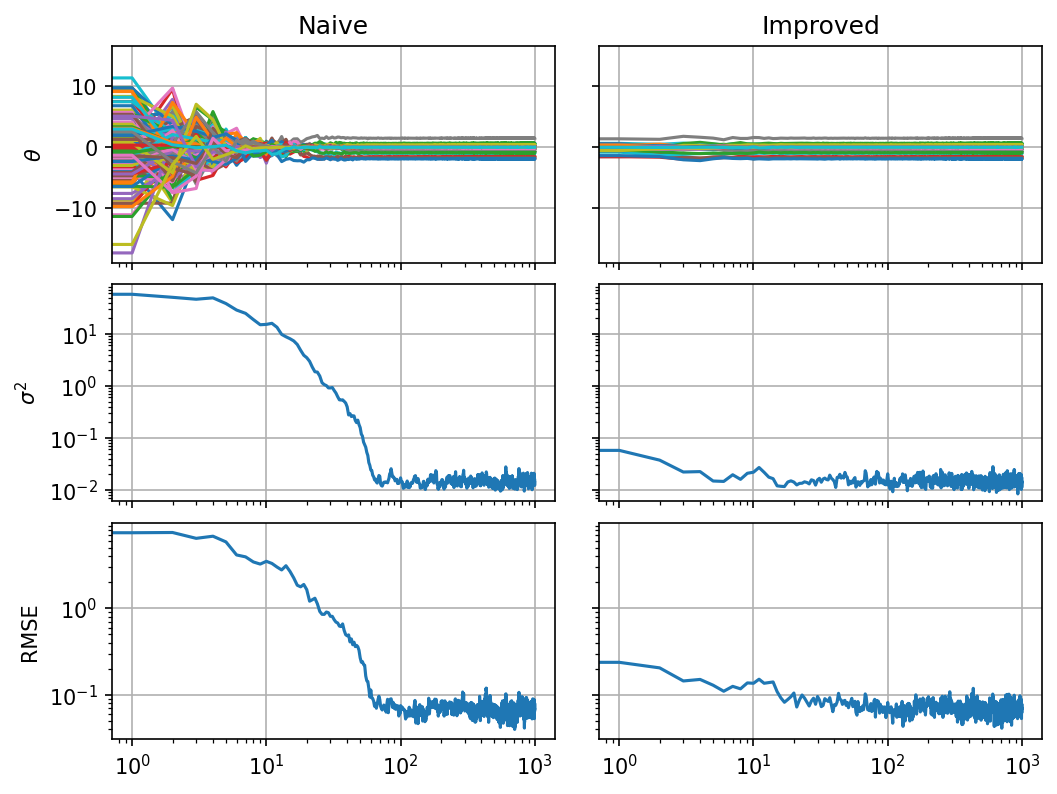

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=150)
axes = fig.subplots(3, 2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

axes[0][0].plot(results_naive[0])
axes[1][0].plot(results_naive[1])
axes[2][0].plot(RMSE_naive)
axes[0][1].plot(results_improved[0])
axes[1][1].plot(results_improved[1])
axes[2][1].plot(RMSE_improved)

axes[0][0].set_ylabel(r"$\theta$")
axes[1][0].set_ylabel(r"$\sigma^2$")
axes[2][0].set_ylabel(r"RMSE")

axes[0][0].set_title("Naive")
axes[0][1].set_title("Improved")
for col in range(2):
    axes[1][col].set_xlabel("Iteration $t$")
    axes[0][col].set_yscale("linear")
    axes[1][col].set_yscale("log")
    axes[2][col].set_yscale("log")
for row, col in product(range(axes.shape[0]), range(axes.shape[1])):
    axes[row][col].set_xscale("log")

for row, col in product(range(axes.shape[0]), range(axes.shape[1])):
    is_left = col == 0
    is_right = col == axes.shape[1] - 1
    is_top = row == 0
    is_bottom = row == axes.shape[0] - 1

    if not is_left:
        axes[row][col].set_yticklabels([])
    if not is_bottom:
        axes[row][col].set_xticklabels([])
    if not is_left:
        axes[row][col].set_ylim(axes[row][0].get_ylim())
    if not is_top:
        axes[row][col].set_xlim(axes[0][col].get_xlim())
    axes[row][col].grid(True)

plt.show()